<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Set-distortion-solution-and-reference-coordinates" data-toc-modified-id="Set-distortion-solution-and-reference-coordinates-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Set distortion solution and reference coordinates</a></span></li></ul></li><li><span><a href="#Read-in-Undistorted-Dithers" data-toc-modified-id="Read-in-Undistorted-Dithers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Undistorted Dithers</a></span></li><li><span><a href="#Apply-distortion-solution" data-toc-modified-id="Apply-distortion-solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Apply distortion solution</a></span><ul class="toc-item"><li><span><a href="#Write-dithers-to-file" data-toc-modified-id="Write-dithers-to-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Write dithers to file</a></span></li></ul></li><li><span><a href="#Plot-dithers" data-toc-modified-id="Plot-dithers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot dithers</a></span><ul class="toc-item"><li><span><a href="#CYCLING-MICRO" data-toc-modified-id="CYCLING-MICRO-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CYCLING MICRO</a></span></li><li><span><a href="#CYCLING-SMALL" data-toc-modified-id="CYCLING-SMALL-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CYCLING SMALL</a></span></li><li><span><a href="#CYCLING-MEDIUM" data-toc-modified-id="CYCLING-MEDIUM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CYCLING MEDIUM</a></span></li><li><span><a href="#CYCLING-LARGE" data-toc-modified-id="CYCLING-LARGE-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CYCLING LARGE</a></span></li><li><span><a href="#REULEAUX-SMALL" data-toc-modified-id="REULEAUX-SMALL-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>REULEAUX-SMALL</a></span></li><li><span><a href="#REULEAUX-MEDIUM" data-toc-modified-id="REULEAUX-MEDIUM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>REULEAUX-MEDIUM</a></span></li><li><span><a href="#REULEAUX-LARGE" data-toc-modified-id="REULEAUX-LARGE-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>REULEAUX-LARGE</a></span></li><li><span><a href="#2-POINT" data-toc-modified-id="2-POINT-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>2-POINT</a></span></li><li><span><a href="#4-POINT-SHORT" data-toc-modified-id="4-POINT-SHORT-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>4-POINT-SHORT</a></span></li><li><span><a href="#4-POINT-SHORT-64-128-256" data-toc-modified-id="4-POINT-SHORT-64-128-256-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>4-POINT-SHORT-64-128-256</a></span></li><li><span><a href="#4-POINT-LONG" data-toc-modified-id="4-POINT-LONG-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>4-POINT-LONG</a></span></li><li><span><a href="#4-POINT-LONG-64" data-toc-modified-id="4-POINT-LONG-64-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>4-POINT-LONG-64</a></span></li><li><span><a href="#4-POINT-LONG-128-256" data-toc-modified-id="4-POINT-LONG-128-256-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>4-POINT-LONG-128-256</a></span></li><li><span><a href="#4-POINT-EXTENDED" data-toc-modified-id="4-POINT-EXTENDED-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>4-POINT-EXTENDED</a></span></li><li><span><a href="#4-POINT-EXTENDED-128" data-toc-modified-id="4-POINT-EXTENDED-128-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>4-POINT-EXTENDED-128</a></span></li><li><span><a href="#4-POINT-EXTENDED-256" data-toc-modified-id="4-POINT-EXTENDED-256-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>4-POINT-EXTENDED-256</a></span></li><li><span><a href="#CPC" data-toc-modified-id="CPC-3.17"><span class="toc-item-num">3.17&nbsp;&nbsp;</span>CPC</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import miricoord.miricoord.imager.mirim_tools as mirim_tools
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#import sys
#sys.path.insert(0,'/Users/ttemim/functional/python_routines/miricoord')
import miricoord

## Set distortion solution and reference coordinates

In [2]:
mirim_tools.set_toolversion('cdp7')
mirim_tools.version()

'cdp7'

In [3]:
XREF=692.5
YREF=511.5

v2ref,v3ref=mirim_tools.xytov2v3(XREF,YREF, 'F770W')
xidealref,yidealref=mirim_tools.v2v3toIdeal(v2ref,v3ref,'MIRIM_FULL')

# Read in Undistorted Dithers

In [4]:
dithers = 'MiriImagingDithers_PRDM25.txt'

In [5]:
#Create a dictionary of tables in the dither file
df = pd.read_csv(dithers, header=None, sep='\t',names=range(3))
table_names = ["CYCLING-MICRO",
               "CYCLING-SMALL",
               "CYCLING-MEDIUM",
               "CYCLING-LARGE",
               "REULEAUX-SMALL",
               "REULEAUX-MEDIUM",
               "REULEAUX-LARGE",
              "2-POINT",
              "4-POINT-SHORT",
              "4-POINT-SHORT-64-128-256",
              "4-POINT-LONG",
              "4-POINT-LONG-64",
              "4-POINT-LONG-128-256",
              "4-POINT-EXTENDED",
              "4-POINT-EXTENDED-128",
              "4-POINT-EXTENDED-256",
               "CPC"]
groups = df[0].isin(table_names).cumsum()
tables = {g.iloc[0,0]: g.iloc[1:] for k,g in df.groupby(groups)}

In [6]:
list(tables)

['CYCLING-MICRO',
 'CYCLING-SMALL',
 'CYCLING-MEDIUM',
 'CYCLING-LARGE',
 'REULEAUX-SMALL',
 'REULEAUX-MEDIUM',
 'REULEAUX-LARGE',
 '2-POINT',
 '4-POINT-SHORT',
 '4-POINT-SHORT-64-128-256',
 '4-POINT-LONG',
 '4-POINT-LONG-64',
 '4-POINT-LONG-128-256',
 '4-POINT-EXTENDED',
 '4-POINT-EXTENDED-128',
 '4-POINT-EXTENDED-256',
 'CPC']

In [7]:
for k,v in tables.items():
    print("table:", k)
    print(v)
    print()

table: CYCLING-MICRO
     0      1      2
1    1  0.000  0.000
2    2  0.015  0.000
3    3  0.033  0.000
4    4  0.054  0.000
5    5  0.000  0.015
6    6  0.015  0.015
7    7  0.033  0.015
8    8  0.054  0.015
9    9  0.000  0.033
10  10  0.015  0.033
11  11  0.033  0.033
12  12  0.054  0.033
13  13  0.000  0.054
14  14  0.015  0.054
15  15  0.033  0.054
16  16  0.054  0.054

table: CYCLING-SMALL
       0      1      2
18     1 -0.220  0.330
19     2  1.155  0.275
20     3  0.880 -0.275
21     4  0.165 -0.770
22     5  0.550 -0.440
23     6 -0.935 -0.715
24     7 -1.210 -0.275
25     8 -0.275 -0.770
26     9 -0.440 -1.210
27    10  0.055  1.045
28    11  1.100 -0.275
29    12 -0.605  0.110
30    13 -0.770 -0.770
31    14  0.715 -0.605
32    15  0.880  0.055
33    16 -0.055 -0.550
34    17  0.770  0.770
35    18 -0.825 -0.825
36    19 -1.100 -0.275
37    20 -0.495 -0.770
38    21 -0.770  0.770
39    22  0.825  0.275
40    23 -0.770  0.275
41    24  0.495 -0.220
42    25 -1.210  0.110
43

# Apply distortion solution

In [8]:
for k,v in tables.items():
    v['x'] = v[1]/0.11
    v['y'] = v[2]/0.11
    v['v2'], v['v3'] = mirim_tools.xytov2v3(XREF + v['x'], YREF + v['y'],'F770W')
    v['xideal'], v['yideal'] = mirim_tools.v2v3toIdeal(v['v2'],v['v3'],'MIRIM_FULL')

## Write dithers to file

In [9]:
f = open('MiriImagingDithers.txt','w')
for k,v in tables.items():
    f.write(k)
    f.write('\n\n')

    df = v[[0,'xideal','yideal']].to_string(index=False,header=False)
    f.write(df)
    
    f.write('\n\n')
f.close()

# Plot dithers

## CYCLING MICRO

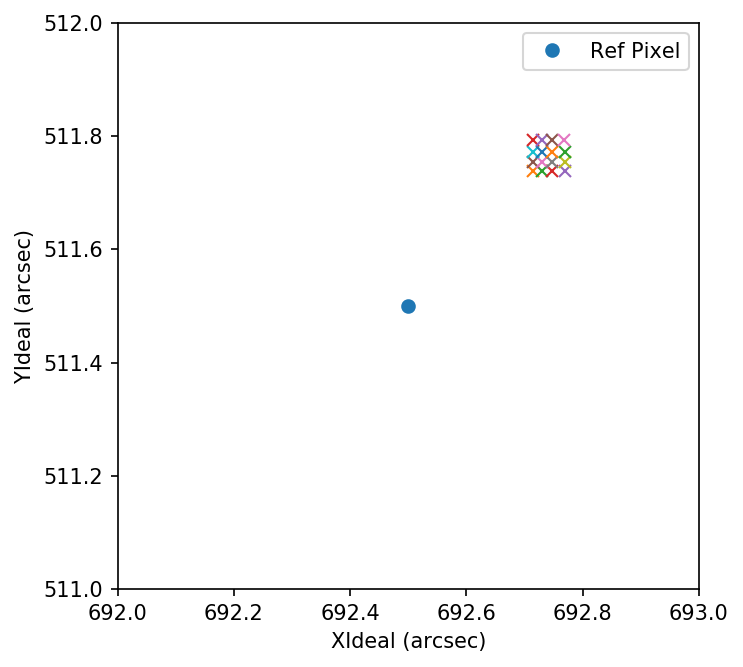

In [10]:
#cycling micro
tab = tables['CYCLING-MICRO']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-.5,XREF+.5)
plt.ylim(YREF-.5,YREF+.5)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## CYCLING SMALL

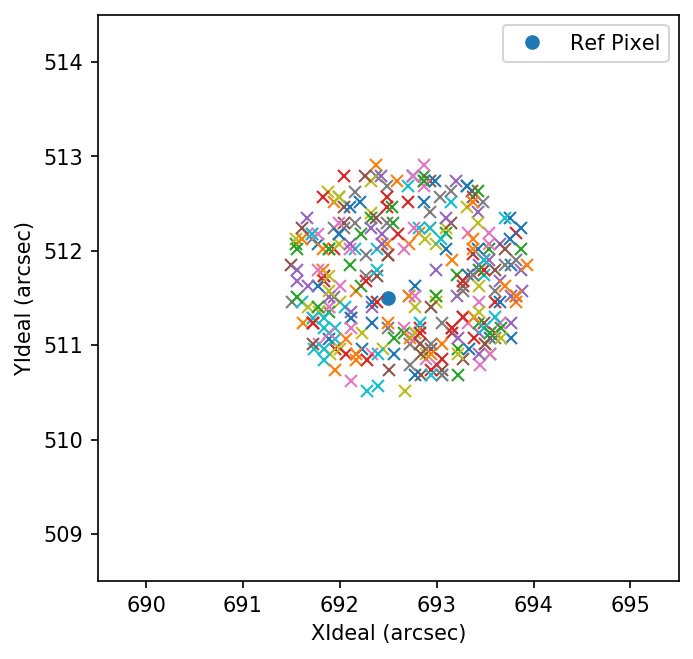

In [11]:
#cycling small
tab = tables['CYCLING-SMALL']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-3,XREF+3)
plt.ylim(YREF-3,YREF+3)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## CYCLING MEDIUM

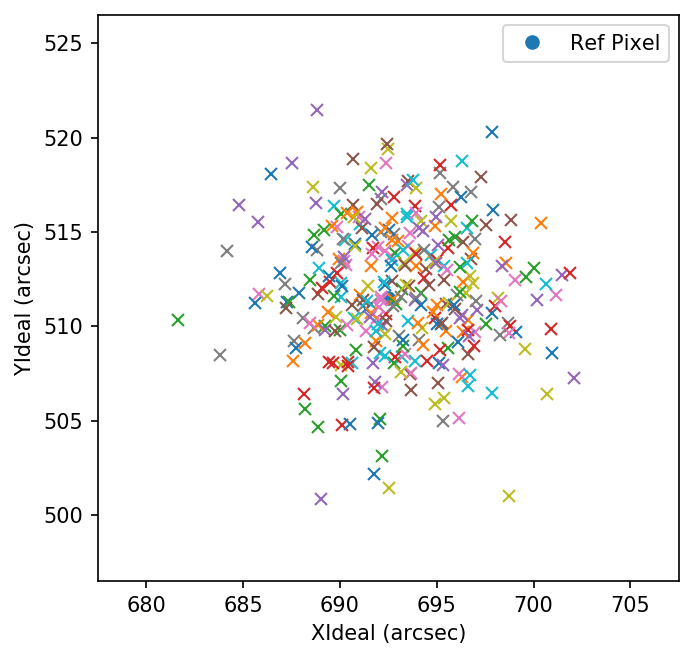

In [12]:
#cycling med
tab = tables['CYCLING-MEDIUM']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-15,XREF+15)
plt.ylim(YREF-15,YREF+15)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## CYCLING LARGE

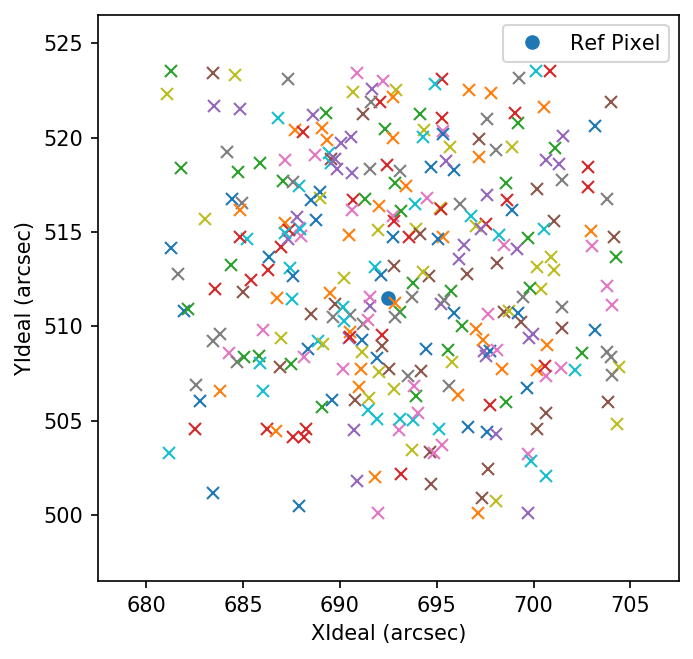

In [13]:
#cycling lg
tab = tables['CYCLING-LARGE']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-15,XREF+15)
plt.ylim(YREF-15,YREF+15)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## REULEAUX-SMALL

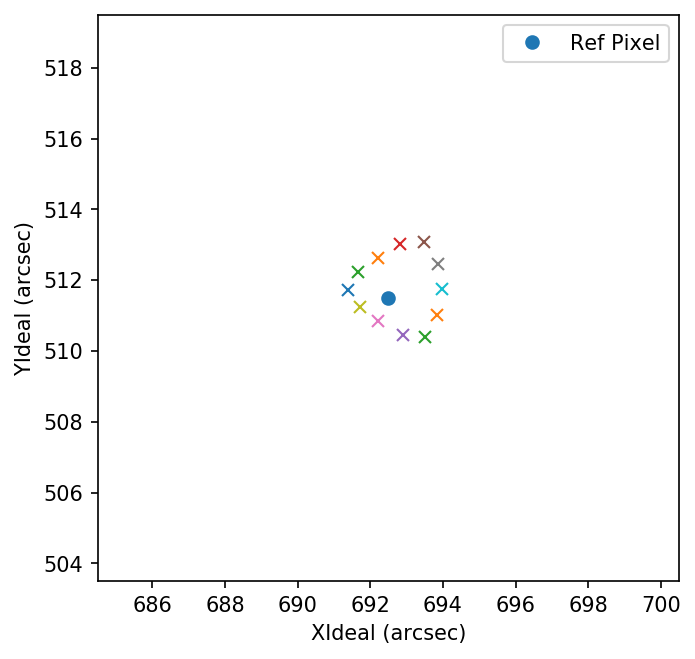

In [14]:
#REULEAUX-SMALL
tab = tables['REULEAUX-SMALL']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-8,XREF+8)
plt.ylim(YREF-8,YREF+8)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## REULEAUX-MEDIUM

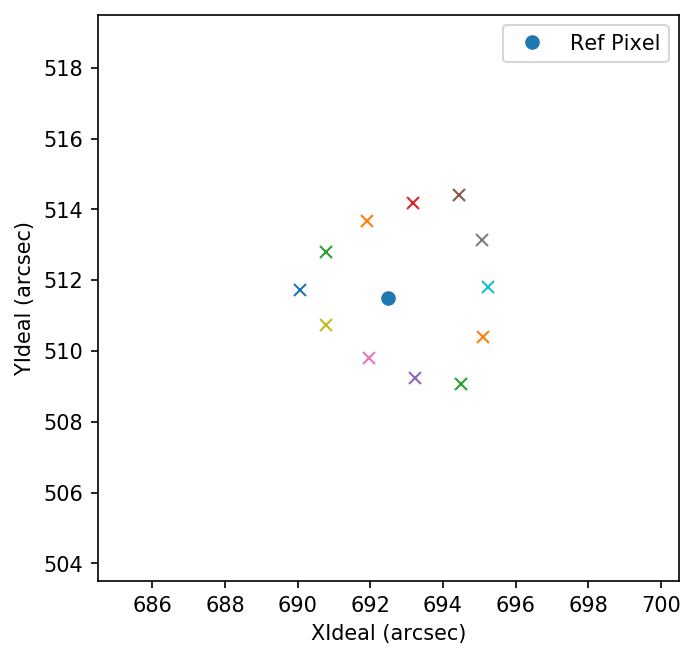

In [15]:
#REULEAUX-MEDIUM
tab = tables['REULEAUX-MEDIUM']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-8,XREF+8)
plt.ylim(YREF-8,YREF+8)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## REULEAUX-LARGE

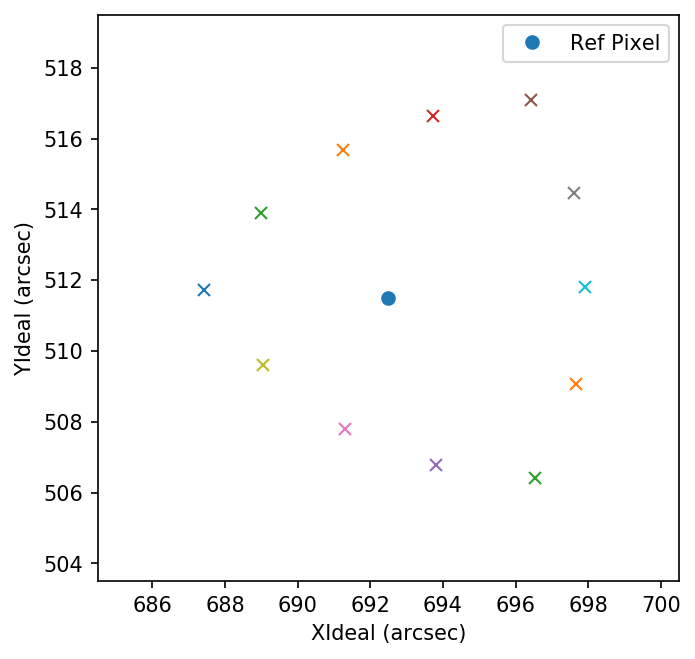

In [16]:
#REULEAUX-LARGE
tab = tables['REULEAUX-LARGE']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-8,XREF+8)
plt.ylim(YREF-8,YREF+8)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 2-POINT

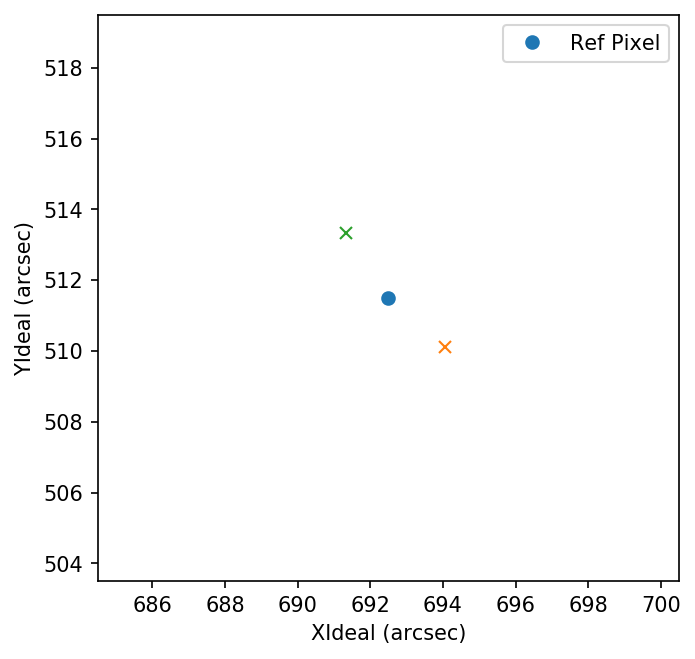

In [17]:
#2 point
tab = tables['2-POINT']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-8,XREF+8)
plt.ylim(YREF-8,YREF+8)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-SHORT

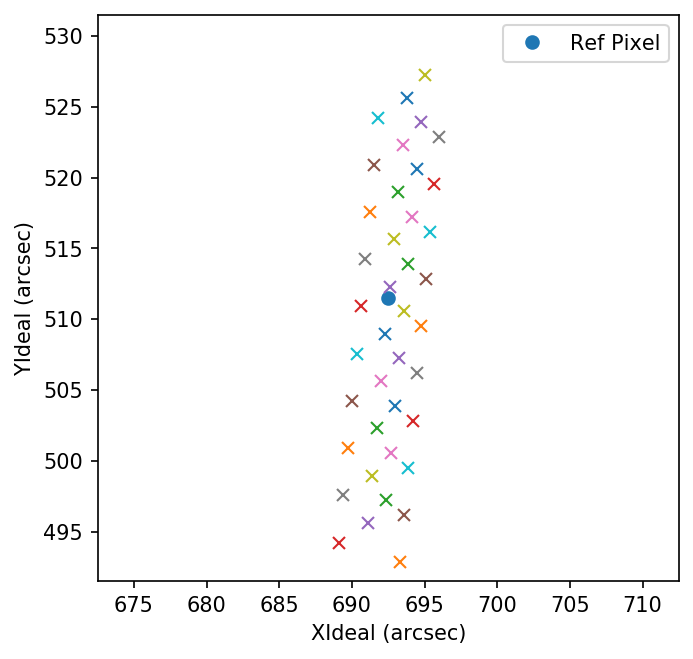

In [18]:
#4 point short
tab = tables['4-POINT-SHORT']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-20,XREF+20)
plt.ylim(YREF-20,YREF+20)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-SHORT-64-128-256

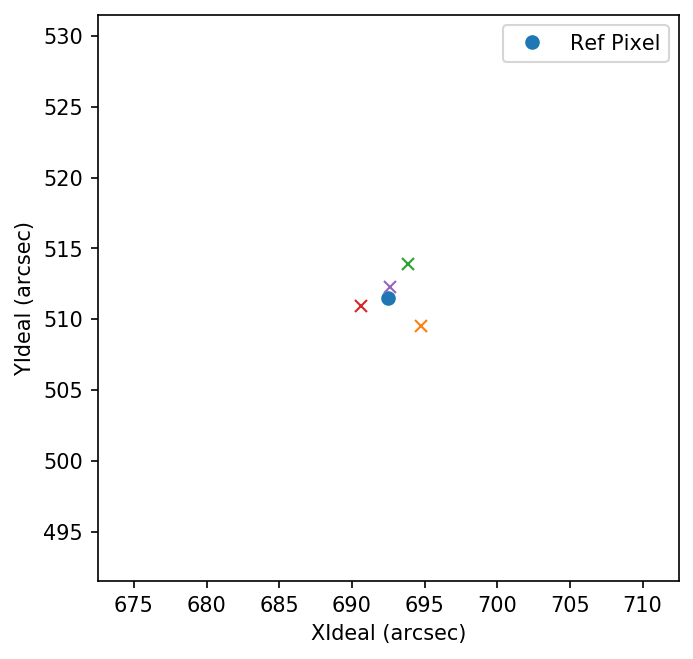

In [19]:
#4 point short 64-
tab = tables['4-POINT-SHORT-64-128-256']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-20,XREF+20)
plt.ylim(YREF-20,YREF+20)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-LONG

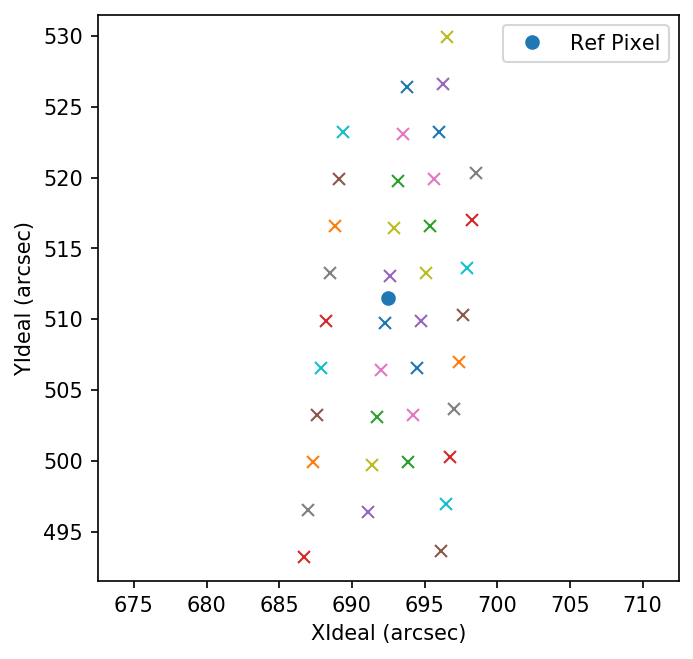

In [20]:
#4 point long
tab = tables['4-POINT-LONG']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-20,XREF+20)
plt.ylim(YREF-20,YREF+20)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-LONG-64

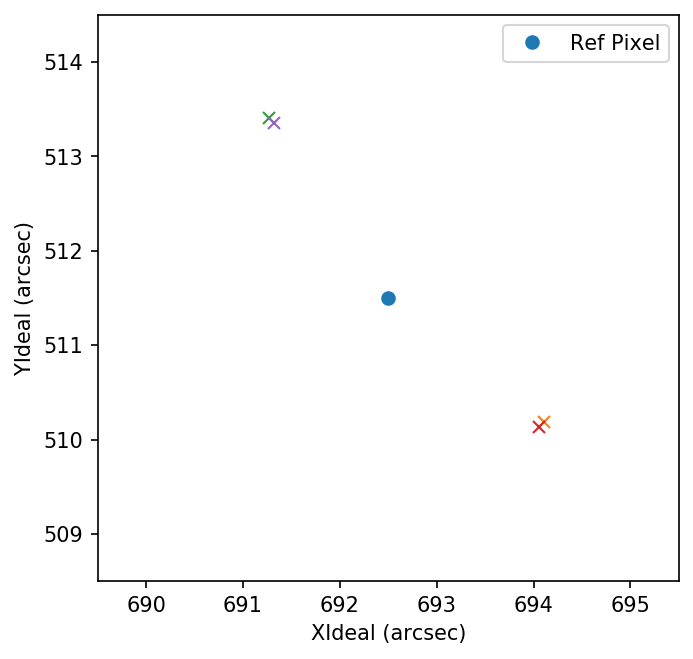

In [21]:
#4 point long64
tab = tables['4-POINT-LONG-64']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-3,XREF+3)
plt.ylim(YREF-3,YREF+3)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-LONG-128-256

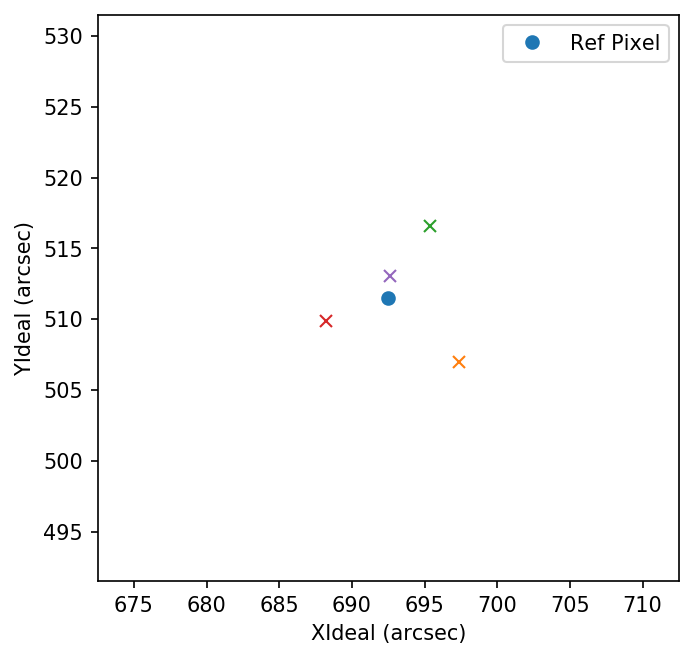

In [22]:
#4 point long 128
tab = tables['4-POINT-LONG-128-256']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-20,XREF+20)
plt.ylim(YREF-20,YREF+20)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-EXTENDED

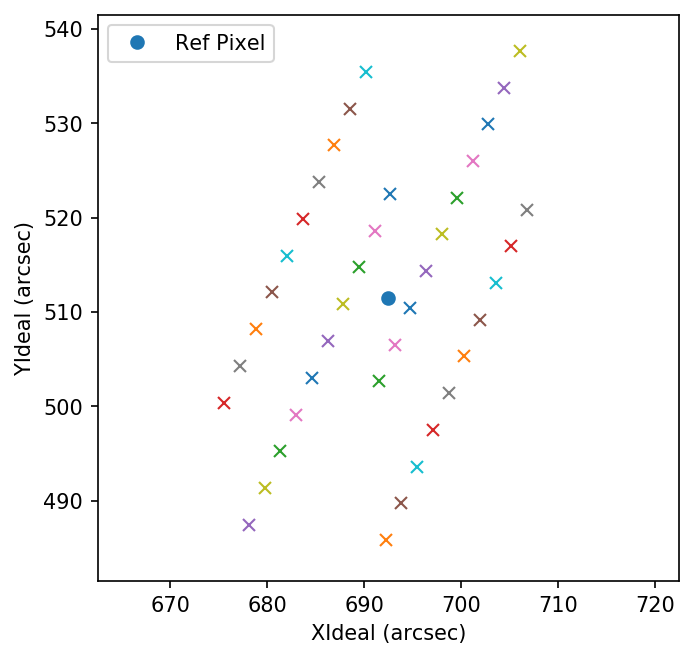

In [23]:
#4 point ext
tab = tables['4-POINT-EXTENDED']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-30,XREF+30)
plt.ylim(YREF-30,YREF+30)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-EXTENDED-128

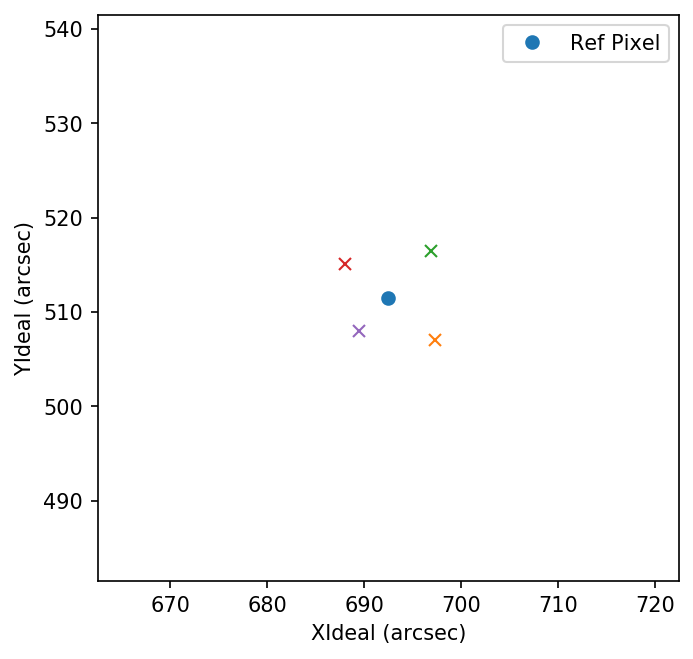

In [24]:
#4 point ext128
tab = tables['4-POINT-EXTENDED-128']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-30,XREF+30)
plt.ylim(YREF-30,YREF+30)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## 4-POINT-EXTENDED-256

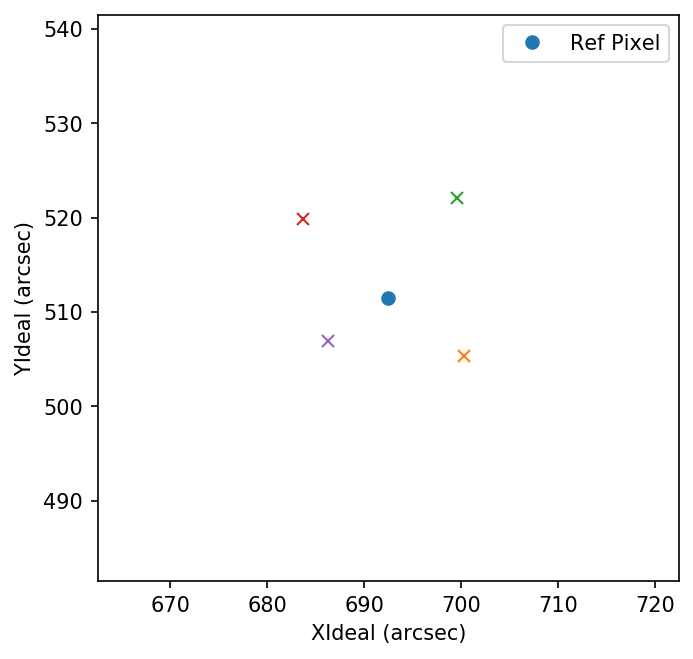

In [25]:
#4 point ext256
tab = tables['4-POINT-EXTENDED-256']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-30,XREF+30)
plt.ylim(YREF-30,YREF+30)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()

## CPC

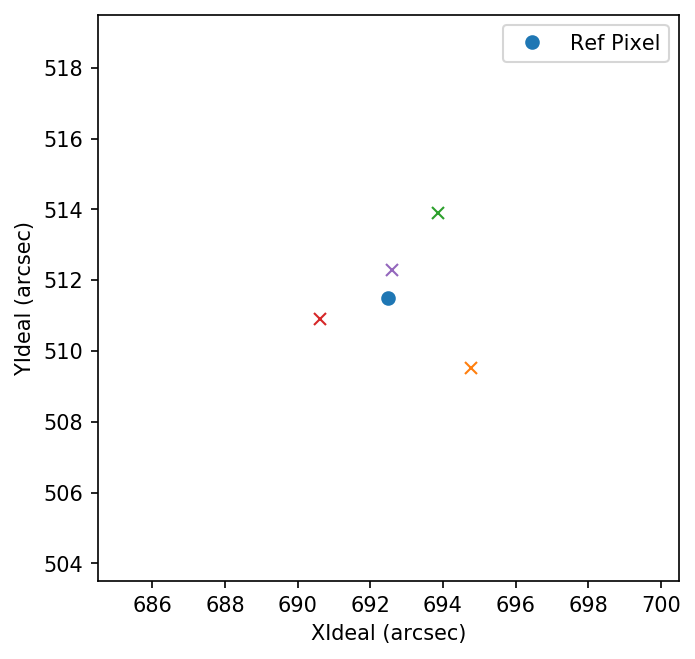

In [26]:
#cpc
tab = tables['CPC']
x = tab['xideal']
y = tab['yideal']
plt.figure(figsize=(5,5),dpi=150)

plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

plt.xlim(XREF-8,XREF+8)
plt.ylim(YREF-8,YREF+8)
plt.plot(XREF,YREF,'o',label='Ref Pixel')

for i,j in zip(x,y):
    plt.plot(XREF+i, YREF+j, 'x')
plt.legend()
plt.show()